# Part II - (Prosper Loan Data Presentation)
## by (Ibiwoye Bisola)

## Investigation Overview


> My exploration was guided with a leading question "What factors affects the annual percentage rate (BorrowerAPR)" thus i explored the relationship between BorrowerAPR and loan amount, Prosper score, loan term, employment status. I discovered loan amount is one of the determining factors of BorrowerAPR, as amount increases the BorrowerAPR reduces. The BorrowerRate structure is similar to the  BorrowerAPR, BorrowerAPR is BorrowerRate plus other fees and charges. The prosper score which is a determinant of credit worthiness influences the loan amount and resultantly influence the BorrowerAPR. Most people fall under the 36 months loan term category.

## Dataset Overview

> The data set contained 113937 entries arranged in the rows and 81 variables partitioned into columns. Some columns were selected from the dataset for easy exploration. The main feature of interest was the annual percentage rate (BorrowerAPR). 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
columns = ['LoanOriginalAmount', 'Term', 'ProsperScore','BorrowerAPR', 'BorrowerRate', 'Occupation', 'OnTimeProsperPayments',
          'EmploymentStatus', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors','AvailableBankcardCredit']

subset_var = df[columns]

## (Visualization 1)

> Plot a scatter plot to show the relationship between loan amount and annual percentage rate.

> Lower amount has higher rate while higher amount has lower rate, with values below 5000 having the highest rate. This means Loan amount and Borrower's annual percentage rate are negatively correlated, as amount increases, the APR reduces and vice-versa. Real life interpretation of Prosper data mean people who borrow higher amount pay lesser annual rate.

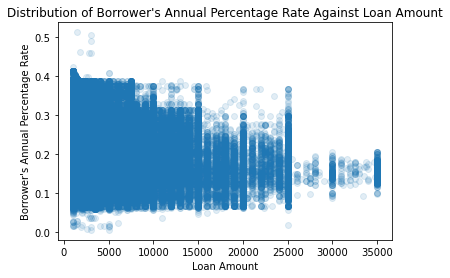

In [4]:
plt.scatter(data = subset_var, y = 'BorrowerAPR', x = 'LoanOriginalAmount', alpha = 1/8);
plt.ylabel('Borrower\'s Annual Percentage Rate')
plt.xlabel('Loan Amount')
plt.title("Distribution of Borrower's Annual Percentage Rate Against Loan Amount")

plt.show()

## (Visualization 2)

> Plot a box plot to show the relationship between prosper score and annual percentage rate.

> Low prosper score has high annual percentage rate while high prosper score has low annual percentage rate. This means people with high credit worthiness pay lower interest rate than those with low credit worthiness.

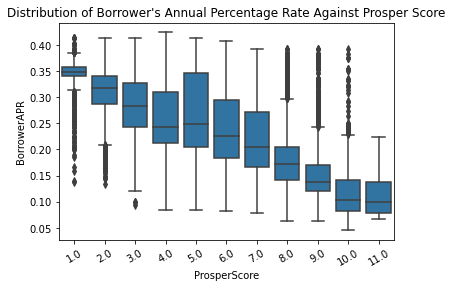

In [5]:
default_color = sns.color_palette()[0]
sns.boxplot(data=subset_var, x='ProsperScore', y='BorrowerAPR', color= default_color)
plt.xticks(rotation=30)
plt.title("Distribution of Borrower's Annual Percentage Rate Against Prosper Score")


plt.show()

## (Visualization 3)

> Facet grid showing the relationship between borrower's annual percentage rate and loan term.

> More people fall in the 36 months loan category, however the annual percentage rate is higher for the 36 months loan stretching beyond 0.4 while the annual percentage interest rate for 60 months loan term is lower. This opposed the hypothesis i had that higher loan term means higher interest rate.

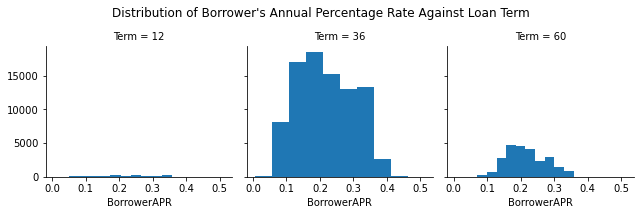

In [5]:
g = sns.FacetGrid(data = subset_var, col = 'Term')
g.map(plt.hist, "BorrowerAPR")
g.fig.suptitle("Distribution of Borrower's Annual Percentage Rate Against Loan Term")
plt.subplots_adjust(top=0.8)    

plt.show()

## (Visualization 4)

> plot matrix showing the relationship between annual percentage rate, interest rate and loan amount.

> Loan amount is negatively correlated with BorrowerAPR and BorrowerRate, BorrowerRate is positively correlated with BorrowerAPR. BorrowerAPR and BorrowerRate are normal bell shaped distribution while loan amount is skewed to the right with most of the distribution on the tail.



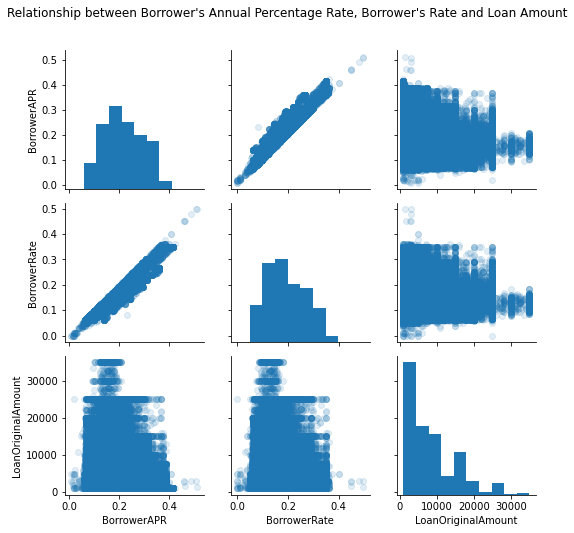

In [7]:
g = sns.PairGrid(data = subset_var, vars = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 1/8)
g.fig.suptitle("Relationship between Borrower's Annual Percentage Rate, Borrower's Rate and Loan Amount")
plt.subplots_adjust(top=0.9)    

plt.show()

In [ ]:
!jupyter nbconvert part_II_slide.ipynb --to slides --post serve --no-input --no-prompt